In [1]:
import tensorflow as tf

x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x**2 + x

dy_dx = tape.gradient(y, x)
print(dy_dx.numpy())

2025-03-28 23:45:12.202690: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-28 23:45:12.340646: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-28 23:45:12.473856: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743201912.572329    9950 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743201912.604622    9950 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-28 23:45:12.877768: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

7.0


2025-03-28 23:45:15.616325: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [3]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]] # automatic cast to tf.constant

with tf.GradientTape(persistent=True) as tape:
    y = tf.nn.sigmoid(x @ w + b)
    loss = tf.reduce_mean(tf.math.square(y))

[dl_dw, dl_db] = tape.gradient(loss, [w, b])
print(dl_dw, dl_db)

tf.Tensor(
[[6.3051572e-03 6.3925057e-05]
 [1.2610314e-02 1.2785011e-04]
 [1.8915471e-02 1.9177518e-04]], shape=(3, 2), dtype=float32) tf.Tensor([6.305157e-03 6.392506e-05], shape=(2,), dtype=float32)


In [4]:
x0 = tf.Variable(3.0,name="x0") # A trainable variable
x1 = tf.Variable(3.0,name="x1",trainable=False) # Not trainable
x2 = tf.Variable(2.0,name="x2") + 1.0 # Not a Variable: +tensor = a tensor
x3 = tf.constant(3.0,name="x3") # Not a Variable

with tf.GradientTape() as tape:
    y = (x0**2) + (x1**2) + (x2**2)

grad = tape.gradient(y, [x0, x1, x2, x3])

print(grad)  # 6.0

[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>, None, None, None]


In [5]:
class SimpleModule(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.a_variable = tf.Variable(5.0,name="train_me")
        self.non_trainable_variable = tf.Variable(5.0, trainable=False,name="do_not_train_me")

    def __call__(self, x):
        return self.a_variable * x + self.non_trainable_variable

simple_module = SimpleModule(name="simple")
simple_module(tf.constant(5.0))

<tf.Tensor: shape=(), dtype=float32, numpy=30.0>

In [6]:
class Dense(tf.Module):
    def __init__(self,in_features,out_features,name=None):
        super().__init__(name=name)
        self.w = tf.Variable(tf.random.normal([in_features,out_features]),name="w")
        self.b = tf.Variable(tf.zeros([out_features]),name="b")
    def __call__(self,x):
        y = tf.matmul(x,self.w) + self.b
        return tf.nn.relu(y)

## Exercise 1 - MLP network

Using TensorFlow primitives perform the following steps:

1. allocate random normal variables for weight and bias representation of a
  multi-layer perceptron (MLP) with `n_input` size, two hidden layers with
  `n_hidden_1` and `n_hidden_2` neurons respectively and `n_output` size.

2. define a function which takes a tensor as input and returns the MLP
  prediction. Use the sigmoid function as activation function for all nodes in
  the network except for the output layer, which should be linear.

3. Test the model prediction for 10 values in x linearly spaced from [-1,1] with
  `n_input=1`, `n_hidden_1=5`, `n_hidden_2=2`, `n_output=1`.

In [2]:
import numpy as np
import tensorflow as tf
# Create a sigmoid layer:

tf.random.set_seed(0)

n_input = 1
n_hidden_1 = 5
n_hidden_2 = 2
n_output = 1

# Dictionary of weights and biases
weights = { #key: value
    'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1]),name="w1"),
    'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2]),name="w2"),
    'out': tf.Variable(tf.random.normal([n_hidden_2, n_output]),name="w_out")
}
biases = {
    'b1': tf.Variable(tf.random.normal([n_hidden_1]),name="b1"),
    'b2': tf.Variable(tf.random.normal([n_hidden_2]),name="b2"),
    'out': tf.Variable(tf.random.normal([n_output]),name="b_out")
}

def multilayer_perceptron(x):
    layer_1 = tf.sigmoid(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    layer_2 = tf.sigmoid(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Create a random input tensor
x = np.linspace(-1,1,10,dtype=np.float32).reshape(-1,1) # shape (10,1), column vector , -1 means "you figure it out" 
x = tf.constant(x,dtype=tf.float32)
print(f"x: {x}")

# This is the output of a neural network with random weights and biases
out = multilayer_perceptron(x)

print(f"output: {out}")


x: [[-1.        ]
 [-0.7777778 ]
 [-0.5555556 ]
 [-0.33333334]
 [-0.11111111]
 [ 0.11111111]
 [ 0.33333334]
 [ 0.5555556 ]
 [ 0.7777778 ]
 [ 1.        ]]
output: [[-2.7235832]
 [-2.7725837]
 [-2.814471 ]
 [-2.848762 ]
 [-2.875836 ]
 [-2.8965425]
 [-2.911881 ]
 [-2.9228096]
 [-2.9301639]
 [-2.9346485]]


## Exercise 2 - Sequential model

- Translate the previous exercise with TensorFlow/Keras's sequential model.
- Print the model summary to screen.
- Verify that predictions between both models are in agreement.
- Print the weights from the model object.


In [3]:
# print predictions
x = np.linspace(-2, 2, 10, dtype=np.float32).reshape(-1, 1)
y1 = multilayer_perceptron(x)

# Sequential model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(n_hidden_1, activation='sigmoid', input_shape=(n_input,)))
model.add(tf.keras.layers.Dense(n_hidden_2, activation='sigmoid'))
model.add(tf.keras.layers.Dense(n_output, activation='linear')) # activation='linear' is default, so we can also omit it
model.summary()

# assign parameters from previous model
model.set_weights([weights["h1"], biases["b1"],
                   weights["h2"], biases["b2"],
                   weights["out"], biases["out"]])

y2 = model.predict(x)

print(f"output multilayer_perceptron: {y2}")
# compare results
print(f"output keras: {y1}")
# check if results match
if not np.allclose(y1, y2):
    raise ValueError("results do not match")

/home/jiahao/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
output multilayer_perceptron: [[-2.476687 ]
 [-2.5830894]
 [-2.6968765]
 [-2.7944713]
 [-2.8631544]
 [-2.9048204]
 [-2.9268866]
 [-2.9360032]
 [-2.937006 ]
 [-2.9335563]]
output keras: [[-2.476687 ]
 [-2.5830894]
 [-2.6968765]
 [-2.7944713]
 [-2.8631544]
 [-2.9048204]
 [-2.9268866]
 [-2.9360032]
 [-2.937006 ]
 [-2.9335563]]


## Exercise 3 - Manual training with functional API

**Data generation**

1. Generate predictions of `f(x) = 3 * x + 2` for 200 linearly spaced `x` points
   between [-2, 2] in single precision.

2. Include random normal noise (mu=0, sigma=1) to all predictions.

3. Plot data and ground truth model.


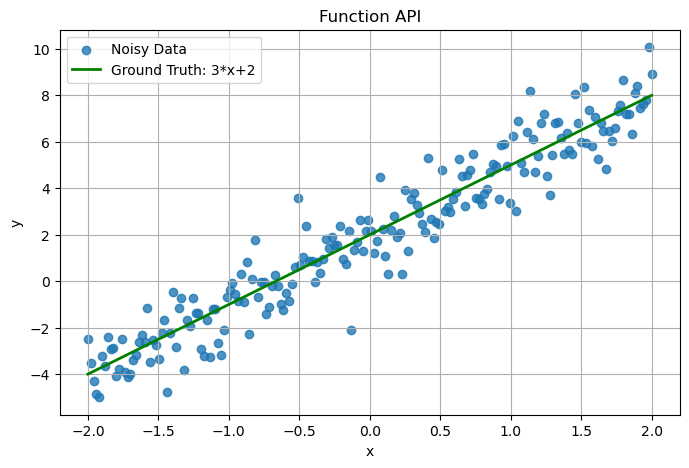

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set seeds for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

def f(x):
    return 3 * x + 2
# =========================
# Data Generation
# =========================
# 1. Generate 200 linearly spaced points between -2 and 2 in single precision.
def GenerateData():
    x = tf.linspace(-2, 2, 200)
    x = tf.cast(x, tf.float32)
    noise = tf.random.normal(shape=x.shape, mean=0.0, stddev=1.0)
    y = f(x)+noise
    return x, y

y_true = f(tf.linspace(-2, 2, 200))
x, y_noisy = GenerateData()

# 3. Plot data and ground truth model.
plt.figure(figsize=(8, 5))
plt.scatter(x, y_noisy, label="Noisy Data", alpha=0.8)
plt.plot(x, y_true, color="green", linewidth=2, label="Ground Truth: 3*x+2")
plt.title("Function API")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

**Linear fit**

4. Define a custom model using `tf.Module` inheritance which returns the
   functional form `w * x + b` where `w` and `b` are tensor variables
   initialized with random values.

5. Define a loss function matching the mean squared error.

6. Plot data, ground truth model, predictions and loss function for the
   untrained model.

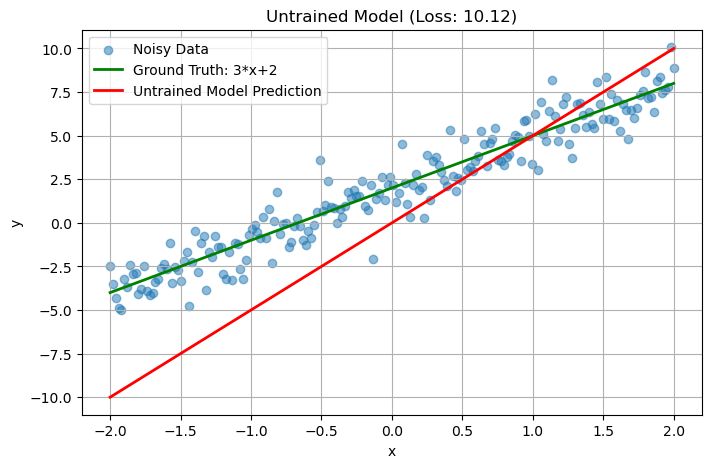

In [ ]:
# =========================
# Linear Fit with Custom tf.Module
# =========================
# 4. Define a custom linear model using tf.Module.
class LinearModel(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name) # Call the parent constructor.
        # Initialize w and b with random values.
        self.w = tf.Variable(5.0, name="weight")
        self.b = tf.Variable(0.0, name="bias")
    
    def __call__(self, x):
        return self.w * x + self.b

# 5. Define the mean squared error loss function.
def mse_loss(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Instantiate the model.
model = LinearModel(name="linear_model")

# 6. Plot data, ground truth, and predictions of the untrained model.
y_pred_untrained = model(x)
loss_untrained = mse_loss(y_pred_untrained, y_noisy)

plt.figure(figsize=(8, 5))
plt.scatter(x, y_noisy, label="Noisy Data", alpha=0.5)
plt.plot(x, y_true, color="green", linewidth=2, label="Ground Truth: 3*x+2")
plt.plot(x, y_pred_untrained, color="red", linewidth=2, label="Untrained Model Prediction")
plt.title(f"Untrained Model (Loss: {loss_untrained.numpy():.2f})")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

**Training loop**

7. Define a `train` function which computes the loss function gradient and
   performs a full batch SGD (manually).

8. Define a `training_loop` function which takes performs 10 epochs, prints the
   loss function at each iteration to screen and stores the model weights.

**Post-fit**

9. Print the evolution of weights at each iteration.

10. Plot data, ground truth model, predictions and loss function after the training.

In [6]:
# =========================
# Training Loop (Manual SGD)
# =========================

# report function to print model name, loss, and parameters
def report(model,loss):
    return f"Loss: {loss:.4f}, w: {model.w.numpy():.4f}, b: {model.b.numpy():.4f}"
# 7. Define a single training step using gradient tape.
# Full batch SGD = Gradient Descent (GD)
@tf.function # Compiles the function into a graph for faster execution.
def train_step(model, x, y, learning_rate=0.01):
    with tf.GradientTape() as tape: # Record operations for automatic differentiation. 
        y_pred = model(x) # Forward pass through the model to get predictions 
        loss = mse_loss(y_pred, y) # Compute the loss 
    dw,db = tape.gradient(loss, [model.w, model.b]) # Compute gradients w.r.t. w and b
    model.w.assign_sub(learning_rate * dw) # assign_sub subtracts the product of learning_rate and gradients[0] from model.w, equivalent to -= 
    model.b.assign_sub(learning_rate * db) # Update biases using SGD
    return loss

# 8. Define a training loop function for 10 epochs.
def training_loop(model, x, y, epochs=10, learning_rate=0.01):
    history = []
    weights_history = []
    for epoch in range(epochs):
        loss_val = train_step(model, x, y, learning_rate)
        history.append(loss_val.numpy())
        # Record current weights (w, b)
        weights_history.append((model.w.numpy(), model.b.numpy()))
        print(f"Epoch {epoch+1:02d}: Loss = {loss_val.numpy():.4f}")
    return history, weights_history

print("Starting")
report(model, mse_loss(model(x), y_noisy))
# Run training for 10 epochs.
history, weights_history = training_loop(model, x, y_noisy, epochs=10, learning_rate=0.1)

# =========================
# Post-fit Analysis
# =========================
# 9. Print evolution of weights at each iteration.
print("\nEvolution of weights (w, b):")
for epoch, (w, b) in enumerate(weights_history, start=1):
    print(f"Epoch {epoch:02d}: w = {w:.4f}, b = {b:.4f}")

# 10. Plot data, ground truth, and predictions after training.
y_pred_trained = model(x)
final_loss = mse_loss(y_pred_trained, y_noisy)


Starting
Epoch 01: Loss = 10.1239
Epoch 02: Loss = 6.2976
Epoch 03: Loss = 4.1115
Epoch 04: Loss = 2.8526
Epoch 05: Loss = 2.1218
Epoch 06: Loss = 1.6941
Epoch 07: Loss = 1.4417
Epoch 08: Loss = 1.2915
Epoch 09: Loss = 1.2015
Epoch 10: Loss = 1.1472

Evolution of weights (w, b):
Epoch 01: w = 4.4652, b = 0.3875
Epoch 02: w = 4.0744, b = 0.6974
Epoch 03: w = 3.7889, b = 0.9454
Epoch 04: w = 3.5802, b = 1.1438
Epoch 05: w = 3.4278, b = 1.3025
Epoch 06: w = 3.3164, b = 1.4294
Epoch 07: w = 3.2351, b = 1.5310
Epoch 08: w = 3.1756, b = 1.6122
Epoch 09: w = 3.1322, b = 1.6772
Epoch 10: w = 3.1004, b = 1.7292


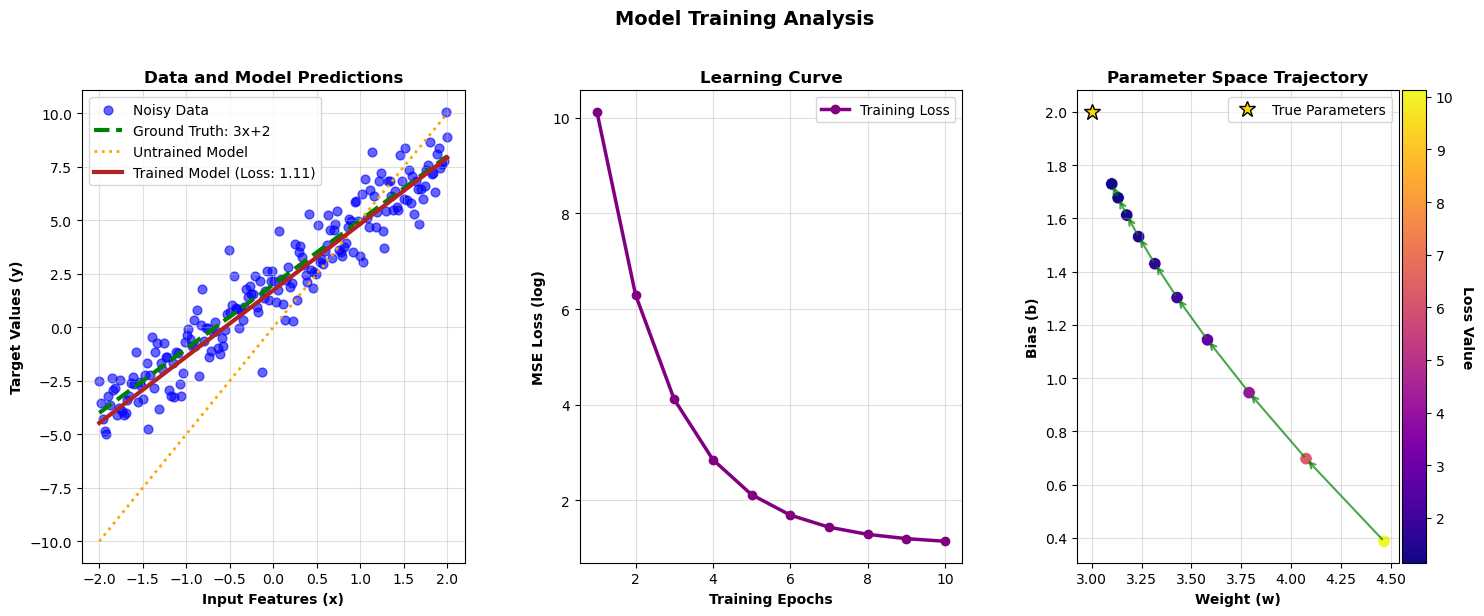

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6), dpi=100)
fig.suptitle('Model Training Analysis', y=1.02, fontsize=14, fontweight='bold')

# Common style parameters
label_font = {'fontsize': 10, 'fontweight': 'bold'}
title_font = {'fontsize': 12, 'fontweight': 'bold'}

# ----------------------
# Model Predictions Plot
# ----------------------
ax[0].scatter(x, y_noisy, s=40, c="blue", alpha=0.6, label="Noisy Data") # 
ax[0].plot(x, y_true, color="green", linewidth=3, linestyle="--", 
          label="Ground Truth: 3x+2") 
ax[0].plot(x, y_pred_untrained, color="orange", linewidth=2, linestyle=':',
          label="Untrained Model")
ax[0].plot(x, y_pred_trained, color="firebrick", linewidth=3, 
          label=f"Trained Model (Loss: {final_loss.numpy():.2f})")
ax[0].set_title("Data and Model Predictions", **title_font)
ax[0].set_xlabel("Input Features (x)", **label_font)
ax[0].set_ylabel("Target Values (y)", **label_font)
ax[0].legend(frameon=True, facecolor="white")
ax[0].grid(alpha=0.4)

# ----------------------
# Training Loss Plot
# ----------------------
epochs = range(1, len(history)+1)
ax[1].plot(epochs, history, color="purple", linewidth=2.5, marker='o', 
          markersize=6, label="Training Loss")
ax[1].set_title("Learning Curve", **title_font)
ax[1].set_xlabel("Training Epochs", **label_font)
ax[1].set_ylabel("MSE Loss (log)", **label_font)
# ax[1].set_yscale('log')  # Better visualization for loss descent
ax[1].legend()
ax[1].grid(alpha=0.4)

# ----------------------
# Parameter Space Plot
# ----------------------
w, b = zip(*weights_history)
sc = ax[2].scatter(w, b, c=history, s=80, cmap='plasma', 
                  edgecolor='w', linewidth=0.5)
cbar = fig.colorbar(sc, ax=ax[2], pad=0.01)
cbar.set_label('Loss Value', rotation=270, labelpad=15, **label_font)

# Add trajectory arrows
for i in range(1, len(w)):
    ax[2].annotate('', xy=(w[i], b[i]), xytext=(w[i-1], b[i-1]),
                  arrowprops=dict(arrowstyle='->', color="green", lw=1.5, alpha=0.7)) 

ax[2].set_title("Parameter Space Trajectory", **title_font)
ax[2].set_xlabel("Weight (w)", **label_font)
ax[2].set_ylabel("Bias (b)", **label_font)
ax[2].grid(alpha=0.4)

# Add optimal point marker
ax[2].plot(3, 2, '*', markersize=12, color='#ffd700', markeredgecolor='k',
          label='True Parameters')
ax[2].legend(loc='upper right')

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()

**Use Keras**

11. Replace the training loop with Keras model API, check results.

In [11]:
# =========================
# Training using Keras API
# =========================
# 11. Replace the training loop with Keras model API.

# Initialize weight history list
weights_history = []

# Define weight tracking callback
weight_tracker = tf.keras.callbacks.LambdaCallback(
    on_epoch_end=lambda epoch, logs: weights_history.append(
        (keras_model.layers[0].get_weights()[0][0][0],  # w value
         keras_model.layers[0].get_weights()[1][0])     # b value
    )
)

# Build a Keras model equivalent to our custom linear model.
keras_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# Compile the model with mean squared error loss and SGD optimizer.
keras_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                    loss='mse')

# Fit the model on our data.
history_keras = keras_model.fit(x, y_noisy, epochs=10, verbose=1, callbacks=[weight_tracker])

# Get predictions from the Keras model.
y_pred_keras = keras_model.predict(x)

# Retrieve the final weights.
final_weights = keras_model.layers[0].get_weights()
print("\nKeras Model Final Weights:")
print(f"Weight: {final_weights[0].flatten()[0]:.4f}, Bias: {final_weights[1][0]:.4f}")

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.6988  
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3482 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0673 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0479 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0442 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0435 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0433 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0433 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0433 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0433 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Keras Model Final Weights:
Weight: 3.0097, Bias: 1.8261


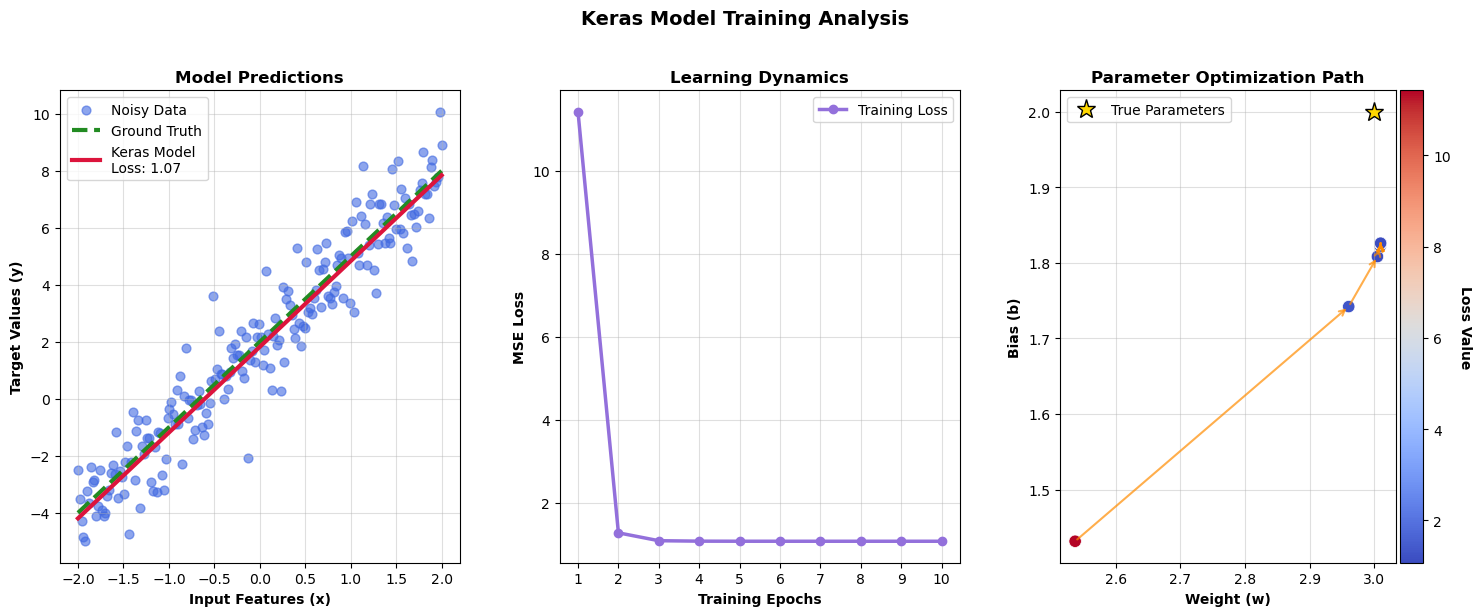


● Final Parameters: w = 3.0097, b = 1.8261
● Distance to True: Δw = 0.0097, Δb = 0.1739


In [12]:
w, b = zip(*weights_history)

# Plot the training dynamics and model predictions.
fig, ax = plt.subplots(1, 3, figsize=(15, 6), dpi=100)
fig.suptitle("Keras Model Training Analysis", y=1.02, fontsize=14, fontweight='bold')

# ----------------------
# Prediction Plot
# ----------------------
ax[0].scatter(x, y_noisy, s=40, color='royalblue', alpha=0.6, 
             label="Noisy Data")
ax[0].plot(x, y_true, color='forestgreen', linewidth=3, linestyle='--',
          label="Ground Truth")
ax[0].plot(x, y_pred_keras, color='crimson', linewidth=3,
          label=f"Keras Model\nLoss: {history_keras.history['loss'][-1]:.2f}")
ax[0].set_title("Model Predictions", **title_font)
ax[0].set_xlabel("Input Features (x)", **label_font)
ax[0].set_ylabel("Target Values (y)", **label_font)
ax[0].legend(frameon=True, facecolor='white', loc='upper left')
ax[0].grid(alpha=0.4)

# ----------------------
# Training Metrics Plot
# ----------------------
epochs_range = range(1, len(history_keras.history['loss']) + 1)
ax[1].plot(epochs_range, history_keras.history['loss'], color='mediumpurple', 
          linewidth=2.5, marker='o', markersize=6, markevery=1,
          label="Training Loss")
ax[1].set_title("Learning Dynamics", **title_font)
ax[1].set_xlabel("Training Epochs", **label_font)
ax[1].set_ylabel("MSE Loss", **label_font)
# ax[1].set_yscale('log')
ax[1].grid(alpha=0.4)
ax[1].legend()
ax[1].set_xticks(epochs_range)

# ----------------------
# Parameter Space Plot
# ----------------------
sc = ax[2].scatter(w, b, c=history_keras.history['loss'], s=80, 
                  cmap='coolwarm', edgecolor='white', linewidth=0.5)
cbar = fig.colorbar(sc, ax=ax[2], pad=0.01)
cbar.set_label('Loss Value', rotation=270, labelpad=15, **label_font)

# Add optimization trajectory
for i in range(1, len(w)):
    ax[2].annotate('', xy=(w[i], b[i]), xytext=(w[i-1], b[i-1]),
                  arrowprops=dict(arrowstyle='->', color='darkorange', 
                                lw=1.5, alpha=0.7))

ax[2].plot(3, 2, '*', markersize=14, color='gold', 
         markeredgecolor='black', label='True Parameters')
ax[2].set_title("Parameter Optimization Path", **title_font)
ax[2].set_xlabel("Weight (w)", **label_font)
ax[2].set_ylabel("Bias (b)", **label_font)
ax[2].grid(alpha=0.4)
ax[2].legend()

plt.tight_layout()
plt.subplots_adjust(wspace=0.25)
plt.show()

# Formatted output
final_w = keras_model.layers[0].get_weights()[0][0][0]
final_b = keras_model.layers[0].get_weights()[1][0]
print(f"\n● Final Parameters: w = {final_w:.4f}, b = {final_b:.4f}")
print(f"● Distance to True: Δw = {abs(3-final_w):.4f}, Δb = {abs(2-final_b):.4f}")